# Rotating cylinders

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
x = np.linspace(-1.40, 1.40, 129)
y = np.linspace(-1.40, 1.40, 129)

solver = ib.Solver(x, y, iRe=1/100, Co=0.75)

## Immersed boundaries

In [4]:
innerCyl = ib.shapes.cylinder("innerCyl", 0, 0, 0.5, solver.dxmin)
outerCyl = ib.shapes.cylinder("outerCyl", 0, 0, 1.0, solver.dxmin)

solver.set_solids(innerCyl, outerCyl)

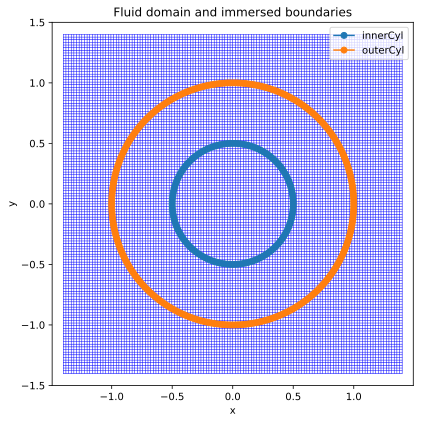

In [5]:
solver.plot_domain()

## Boundary conditions

In [6]:
fvBC = (lambda s, t: np.zeros_like(s),)*4
fuBC = (lambda s, t: np.zeros_like(s),)*4
fsBC = (( (lambda ξ, η, t: -2*η*np.sin(t)), (lambda ξ, η, t: 2*ξ*np.sin(t))), 
          (lambda ξ, η, t: np.zeros_like(ξ),)*2 )

## Steady simulation

In [7]:
%%time
x, t, infodict = solver.steps(solver.zero(), fuBC, fvBC, fsBC, saveEvery=int(1/solver.dt), number=int(10/solver.dt), verbose=int(1/solver.dt))

       k            t          x_2       dxdt_2  innerCyl_fx  innerCyl_fy  outerCyl_fx  outerCyl_fy 
      60  9.84375e-01  2.26425e+01  2.30142e+01  2.58127e-14  1.99563e-14  3.02845e-12  3.02748e-12 
     120  1.96875e+00  3.38587e+01  1.14397e+01 -6.93889e-15 -2.12608e-14 -2.69874e-12 -2.68515e-12 
     180  2.95312e+00  2.10404e+01  2.92525e+01 -1.55431e-15  1.11022e-16 -7.34187e-13 -7.30058e-13 
     240  3.93750e+00  1.84047e+01  2.83199e+01  3.30846e-14  3.11418e-14  4.87890e-12  4.88301e-12 
     300  4.92187e+00  3.07674e+01  1.45451e+01  3.59712e-14  4.14113e-14  5.54426e-12  5.54203e-12 
     360  5.90625e+00  2.18567e+01  2.59141e+01  1.89848e-14  1.75936e-14  2.32260e-12  2.32848e-12 
     420  6.89062e+00  1.45840e+01  2.94059e+01 -1.32672e-14 -1.02141e-14 -1.59111e-12 -1.59298e-12 
     480  7.87500e+00  2.99980e+01  1.65302e+01  4.63518e-14  4.17999e-14  4.17558e-12  4.18052e-12 
     540  8.85937e+00  2.58021e+01  2.24206e+01  1.73611e-14  1.22810e-14  8.28332e-13  8.1

## Display results

Plot velocity components and pressure.

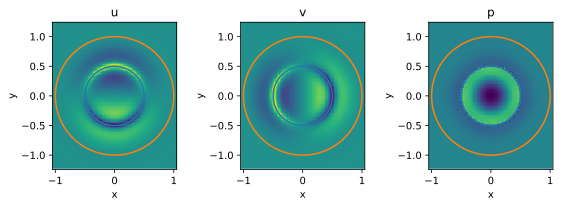

In [8]:
solver.plot_field(x[-1], xlim=(-1, 1), ylim=(-1, 1))

Plot velocity profiles

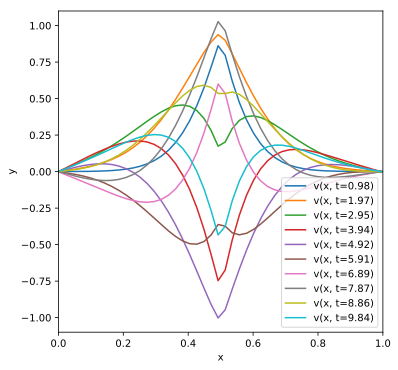

In [9]:
plt.figure(figsize=(5.5, 5.25))
vi = solver.fluid.v.shape[0]//2

vx = np.r_[solver.fluid.x[0], solver.fluid.v.x, solver.fluid.x[-1]]

for tk, xk in zip(t, x):
    u, v, p, *_ = solver.reshape(*solver.unpack(xk))
    vv = np.r_[fvBC[0](solver.fluid.v.y[vi], 0), v[vi,:], fvBC[1](solver.fluid.v.y[vi], 0)]
    plt.plot(vx, vv, label='v(x, t=%.2f)'%tk);

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.xlim(0, 1.0)
plt.ylim(-1.1, 1.1);